In [1]:
# Import the required libraries.

import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd

# For Notebook.
%matplotlib inline


In [2]:
# Function to draw the graph.

def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma,nodelist=measures.keys())
    #nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    
    #labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()
    

In [3]:
# Read the data.

d=pd.read_csv('Facebook Data.csv')


In [4]:
# Create the edge list.

edge=[]
x=d.shape[0]
for i in range(0,x):
    tup1=(d.iloc[i,0],d.iloc[i,1])
    tup2=(d.iloc[i,1],d.iloc[i,0])
    edge.append(tup1)
    edge.append(tup2)
    

In [5]:
# Make the Social Network graph.

DiG=nx.DiGraph()
DiG.add_edges_from(edge)
dpos=nx.spring_layout(DiG)


C:\Users\YASH\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\YASH\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


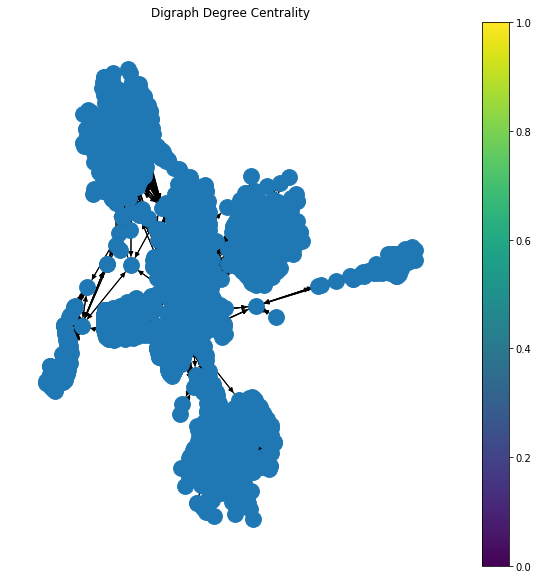

In [6]:
# Plot the graph.

from matplotlib import rcParams

rcParams['figure.figsize']=10,10
draw(DiG, dpos, nx.in_degree_centrality(DiG), 'Digraph Degree Centrality')


In [7]:
# Calculate betweenness centralities.

d1 = nx.betweenness_centrality(DiG)


In [8]:
# Calculate closeness centralities.

d2 = nx.closeness_centrality(DiG)


In [9]:
# Calculate degree centralities.

d3 = nx.degree_centrality(DiG)


In [14]:
# Make the datafram with all the centralities.

nodes= []
bc = []
cc = []
dc = []

for i in d1:
    nodes.append(i)
    bc.append(d1[str(i)])
    cc.append(d2[str(i)])
    dc.append(d3[str(i)])
    
data = {'nodes':nodes,'BC':bc,'CC':cc,'DC':dc}
df = pd.DataFrame(data = data)
df.head()


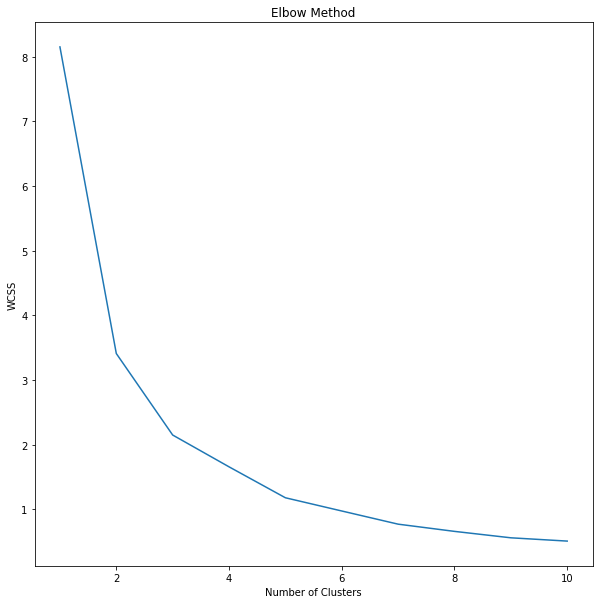

In [18]:
# Start performing K-Means clustering.

X=df.iloc[:,1:4].values

# Use the elbow method to find the ideal number of clusters.
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [19]:
# Perform K-Means clustering and get the predictions.

kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(X)
X


array([[9.50522220e-02, 2.64719554e-01, 1.01258414e-01],
       [2.65135364e-08, 2.09375000e-01, 2.92654375e-03],
       [5.93791273e-07, 2.09426330e-01, 4.97512438e-03],
       ...,
       [0.00000000e+00, 1.20727119e-01, 2.92654375e-04],
       [1.45817995e-04, 1.58403449e-01, 8.77963126e-04],
       [0.00000000e+00, 1.20684479e-01, 2.92654375e-04]])

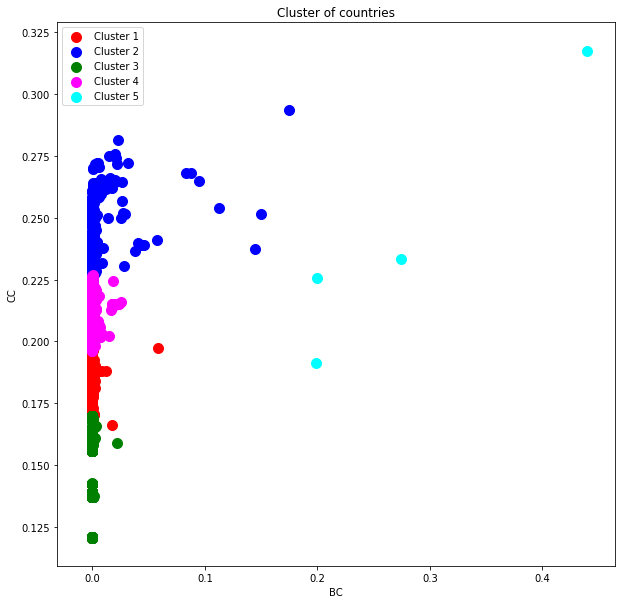

In [20]:
# Plot the clusters.

from matplotlib import rcParams
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Cluster 3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='magenta',label='Cluster 4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='cyan',label='Cluster 5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
rcParams['figure.figsize']=20,20
plt.title('Cluster of countries')
plt.xlabel('BC')
plt.ylabel('CC')
plt.legend()
plt.show()


In [21]:
# Make a dataframe with data description of the main dataframe.

x=df.describe()
x


,BC,CC,DC
count,6835.000000,6835.000000,6835.000000
mean,0.000633,0.192996,0.007556
std,0.008440,0.031726,0.010738
min,0.000000,0.120655,0.000293
25%,0.000001,0.169142,0.001463
50%,0.000023,0.189124,0.004097
75%,0.000141,0.212398,0.009365
max,0.439929,0.317255,0.305824


In [22]:
# Accept two nodes to check if the request would be accepted or not.

n1=int(input("Enter 1st node"))
n2=int(input("Enter 2nd node"))


Enter 1st node27
Enter 2nd node3435


In [23]:
# Use zAlpha method to predict if the request would be accepted.

from scipy import stats
samp2=[]
for i in range(4039):
    samp2.append((df.iloc[i,1]+df.iloc[i,2]+df.iloc[i,3])/3)
    
samp1=[(df.iloc[n1,1]+df.iloc[n1,2]+df.iloc[n1,3])/3,(df.iloc[n2,1]+df.iloc[n2,2]+df.iloc[n2,3])/3]
#print(y_kmeans[n1],y_kmeans[n2])
zalpha=sum(abs(stats.zscore(samp2)))/4039


In [34]:
# Perform the final prediction.

import math
if y_kmeans[n1]!=y_kmeans[n2]:
    #Hypothesis testing
    mu=(x.iloc[1,0]+x.iloc[1,1]+x.iloc[1,2])/(3)
    xbar=((df.iloc[n1,1]+df.iloc[n2,1])+(df.iloc[n1,2]+df.iloc[n2,2])+(df.iloc[n1,3]+df.iloc[n2,3]))/6
    dif1=x.iloc[1,0]-mu
    dif2=x.iloc[1,1]-mu
    dif3=x.iloc[1,2]-mu
    sd=math.sqrt(((math.pow(dif1,2)+math.pow(x.iloc[2,0],2))+(math.pow(dif2,2)+math.pow(x.iloc[2,1],2))+(math.pow(dif3,2)+math.pow(x.iloc[2,2],2)))/(3))
    z=abs(xbar-mu)/(sd/math.sqrt(2))
    print(z)
    if z<zalpha:
        print("Friend request is accepted")
    else:
        print("Friend request not accepted")
    

0.010011833158539386
Friend request is accepted
